In [16]:
%config ZMQInteractiveShell.ast_node_interactivity='all' 

***

## Pandas第一课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。
***

## 作业

##### 说明：我们下面做的这一系列操作都属于数据预处理的范畴。在做实际machine learning问题的时候，很多时候我们都需要对数据进行预处理操作，方便后续的建模。


#### 1.构建三个Series，分别是一系列商品的单价，计量单位，和数量。至于是什么商品什么计量单位由大家自己决定。


In [2]:
import pandas as pd
prices = {'Piano': 180000, 'Violin': 50000, 'Viola': 60000, \
         'Guitar': 3000, 'Ukulele': 1000, 'Iphone': None}
instrument_prices = pd.Series(prices, name="price")
counts = {'Piano': 5, 'Violin': 10, 'Viola': 15, \
         'Guitar': 20, 'Ukulele': 25, 'Iphone': 30}
instrument_counts = pd.Series(counts, name="count")
units = {'Piano': 'RMB', 'Violin': 'Dollar', 'Viola': 'Dollar', \
         'Guitar': 'Dollar', 'Ukulele': 'RMB', 'Iphone': 'RMB'}
instrument_units = pd.Series(units, name="unit")
print(instrument_prices)
print(instrument_counts)
print(instrument_units)

Piano      180000.0
Violin      50000.0
Viola       60000.0
Guitar       3000.0
Ukulele      1000.0
Iphone          NaN
Name: price, dtype: float64
Piano       5
Violin     10
Viola      15
Guitar     20
Ukulele    25
Iphone     30
Name: count, dtype: int64
Piano         RMB
Violin     Dollar
Viola      Dollar
Guitar     Dollar
Ukulele       RMB
Iphone        RMB
Name: unit, dtype: object


#### 2.然后把这三个Series合并成一个DataFrame

In [8]:
df_instruments = pd.DataFrame({instrument_prices.name:instrument_prices,instrument_counts.name:instrument_counts, \
                               instrument_units.name:instrument_units})
df_instruments

,price,count,unit
Piano,180000.0,5,RMB
Violin,50000.0,10,Dollar
Viola,60000.0,15,Dollar
Guitar,3000.0,20,Dollar
Ukulele,1000.0,25,RMB
Iphone,NaN,30,RMB


#### 3.请同学们自行从yahoo finance下载一些股票数据，然后用read_csv载入并作出折线图


(array([737105., 737119., 737133., 737147., 737150., 737164., 737178.,
        737180., 737194.]), <a list of 9 Text xticklabel objects>)

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Index')

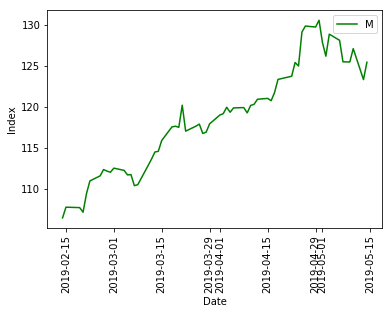

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Index')

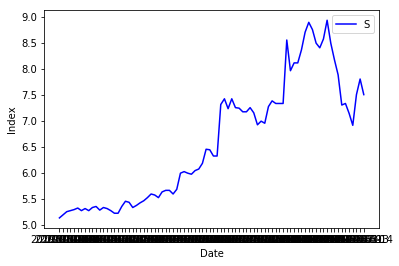

In [56]:
# ref link: https://pypi.org/project/fix-yahoo-finance/
# ref link2: 
# !pip install pandas-datareader
# !pip install fix_yahoo_finance --upgrade --no-cache-dir
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
from pandas import plotting as pdp

pdp.register_matplotlib_converters()
yf.pdr_override()

msft = yf.Ticker("MSFT") # 微软

# # get historical market data
# use fix_yahoo_finance's history method
df_msft = msft.history(period="3mo", interval="1d")
# df_msft

# use pandas_datareader's DataReader method
df_sg = pdr.DataReader("600018.SS","yahoo",datetime.datetime(2019,1,1),datetime.date.today()) # 上港集团
df_sg.to_csv(r'leo-stock-data.csv',columns=df_sg.columns,index=True)
# df_sg

# use pandas' read_csv method
df_sg_from_read = pd.read_csv("leo-stock-data.csv", index_col='Date')
# df_sg_from_read

plt.plot(df_msft.index, df_msft.Close, 'green')
plt.xticks(rotation='vertical')
plt.legend('Microsoft')
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()
plt.plot(df_sg_from_read.index, df_sg_from_read.Close, 'blue')
# plt.xticks(rotation='vertical')
plt.legend('SG')
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()

#### 4. 0.Teacher/data/文件夹下有个文件叫做titanic.csv ，这个文件包含了在titanic事件中乘客的存活情况。请把这个文件读入成一个pandas dataframe

In [95]:
raw_path = os.path.join(os.path.pardir,os.path.pardir,os.path.pardir,'data','raw')
titanic_csv_path = os.path.join(raw_path,'titanic','train.csv')
titanic_data = pd.read_csv(titanic_csv_path)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 5.把每一列中的sex，sex为male的都改成1，sex为female的改成0,

In [96]:
# titanic_data[titanic_data.Sex == 'male'].Sex = 1
# titanic_data[titanic_data.Sex == 'female'].Sex = 0
# titanic_data.head()
titanic_data.loc[titanic_data.Sex == 'male', 'Sex'] = 1
titanic_data.loc[titanic_data.Sex == 'female', 'Sex'] = 0
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


#### 6.把Cabin中的NaN都填充成0 (使用fillna方法)

In [97]:
titanic_data['Cabin'].fillna(0, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


#### 7.现在我们想把乘客按照年龄做一个分类
- 年龄在0-11岁的为0类,12-22为1类，23-33为2类，34-44为3类，45-55为4类，56-66为5类，其余为6类
- 请做把Age改成乘客的年龄类别，如果年龄有缺失，就放入乘客的平均年龄


In [72]:
# 判断年龄列是否存在NaN -> 存在
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [98]:
# 计算平均年龄并替换年龄为NaN的地方
from decimal import Decimal, ROUND_HALF_UP

origin_num = Decimal(str(titanic_data['Age'].mean()))
answer_num = float(origin_num.quantize(Decimal('0.0'), rounding=ROUND_HALF_UP))
print("average age is: ", answer_num)
titanic_data['Age'].fillna(answer_num, inplace=True)

# 判断年龄列是否存在NaN -> 不存在
titanic_data.isnull().any()

average age is:  29.7


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [100]:
def age_class_calc(row):
    age = row["Age"]
    if pd.isnull(age):
        return 6
    elif age >= 12 and age <= 22:
        return 1
    elif age >= 23 and age <= 33:
        return 2
    elif age >= 34 and age <= 44:
        return 3
    elif age >= 45 and age <= 55:
        return 4
    elif age >= 56 and age <= 66:
        return 5
    else:
        return 6
age_class = titanic_data.apply(age_class_calc, axis=1)
titanic_data.loc[:,'Age'] = age_class
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,2,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,4,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,6,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,2,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,1,0,237736,30.0708,0,C
